In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from imageio import imread
import codecs
from subprocess import check_output
print(check_output(["ls", "../../../data/task_eda_2_terrorism"]).decode("utf8"))

/tmp/ipykernel_4448/969792023.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


globalterrorismdb_0718dist.csv



In [2]:
terror=pd.read_csv('../../../data/task_eda_2_terrorism/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

terror.columns
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded'] #사상자
terror.head(3)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   

            city   latitude   longitude                   AttackType  Killed  \
0  Santo Domingo  18.456792  -69.951164                Assassination     1.0   
1    Mexico city  19.371887  -99.086624  Hostage Taking (Kidnapping)     0.0   
2        Unknown  15.478598  120.599741                Assassination     1.0   

   Wounded                   Target Summary  \
0      0.0             Julio Guzman     NaN   
1      0.0  Nadine Chaval, daughter     NaN   
2      0.0                 Employee     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   

  Weapon_type Motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0  
2     Unknown    NaN          1.0

In [3]:
terror.to_excel('check_terror.xlsx',index=False)

In [4]:
terror.isnull().sum() #각 column에 값이 누락된 개수(NaN,null)

Year                0
Month               0
Day                 0
Country             0
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [5]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])

print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

# a.loc["index"] : 해당 인덱스의 행의 전체값 가져온다

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


많이 일어나는 나라는 이라크이지만 대륙은 아프리카

### Step 1. 연도별 테러 발생 수 확인

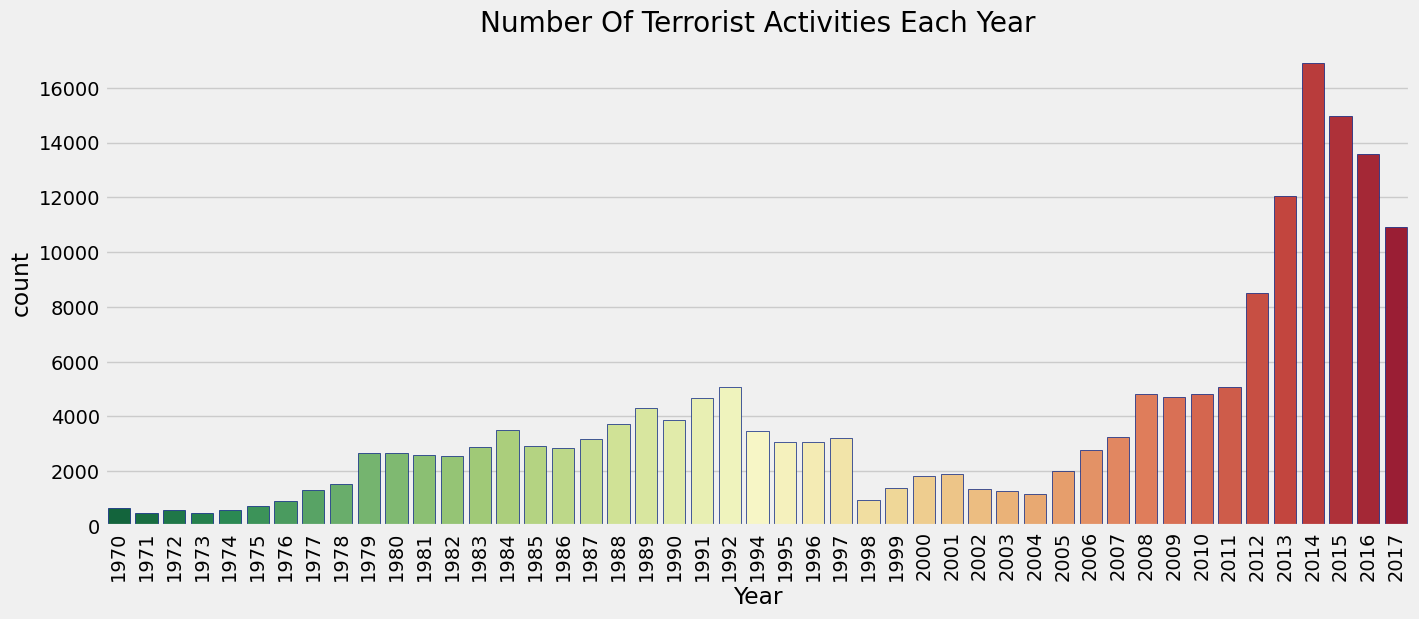

In [6]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()


가장많이 테러가 일어난 연도 10개 추리기

In [7]:
top_year=terror['Year'].value_counts()[:10].to_frame().reset_index()
top_year

Year  count
0  2014  16903
1  2015  14965
2  2016  13587
3  2013  12036
4  2017  10900
5  2012   8522
6  2011   5076
7  1992   5071
8  2010   4826
9  2008   4805

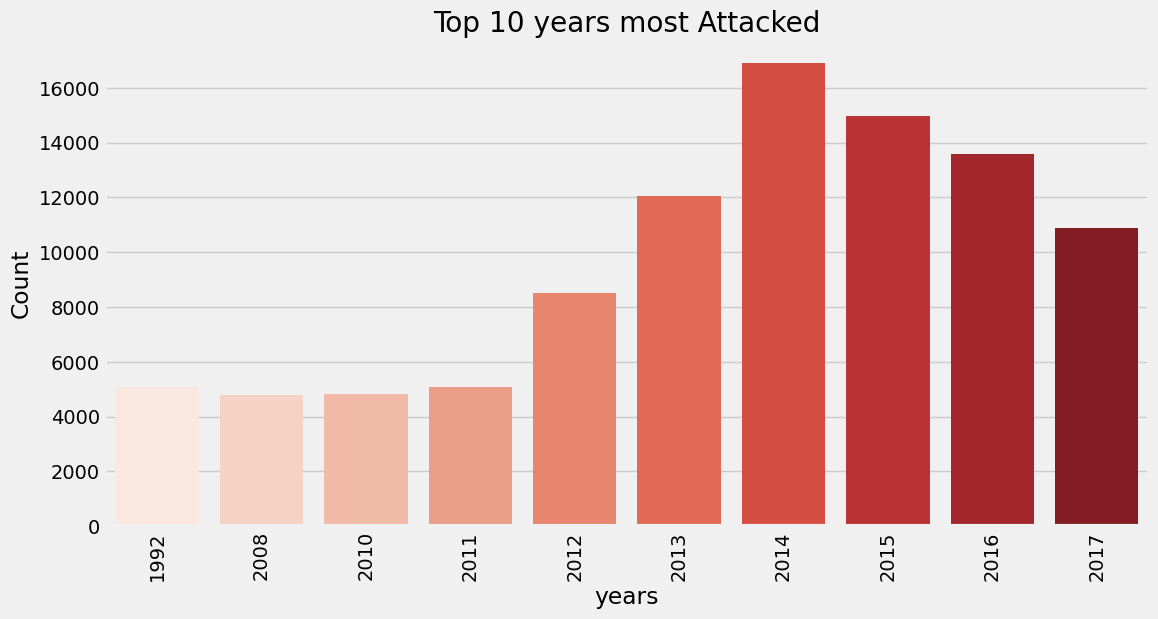

In [8]:
plt.subplots(figsize=(12,6))
top_year.columns= ['Country','Attacks_Counts']
sns.barplot(x='Country',y='Attacks_Counts', data= top_year, palette='Reds')

plt.title('Top 10 years most Attacked')
plt.xlabel('years')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

오라라,테러 빈도수 최상위 연도에 연속성이 보인다 2012년 부터 특히 증가 추이를 보이고 있군! 2012~ 
근데 1992년엔 뭐가 일어난거냐!

그럼 2012년 기준 전후 테러양상의 차이를 봐보쟈 특히 2014~2016년을 주목하자!

근데 그럼 어떤 테러가 그렇게 많이 일어났는데~ 어택 대비 죽인거가 얼마나!

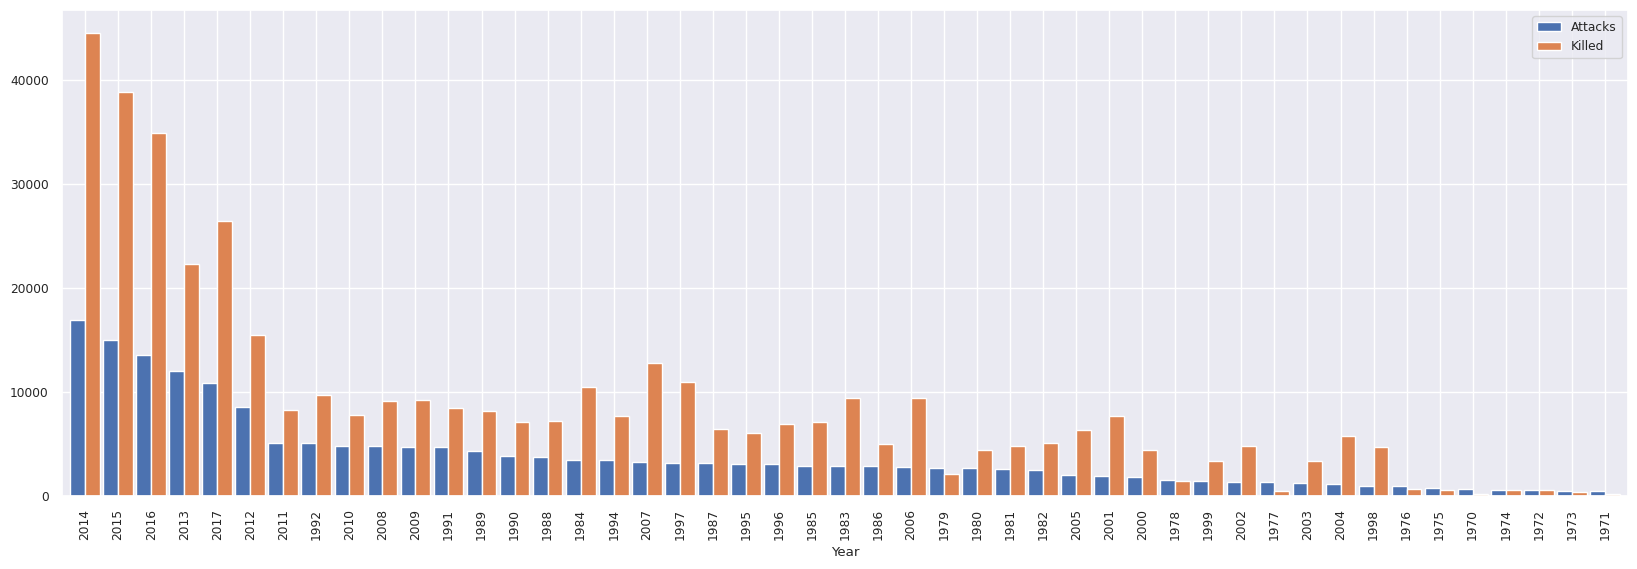

In [28]:
coun_terror=terror['Year'].value_counts().to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Year')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

흠냐냐 2012년도 이후로 많이 테러하고! 많이 죽이고

In [10]:
af2012_terror = terror[terror['Year'] >= 2012]
bf2012_terror = terror[terror['Year'] < 2012]

In [11]:
af2012_terror.head(3)

Year  Month  Day   Country              Region     city   latitude  \
104778  2012      1    1  Pakistan          South Asia   Quetta  30.200819   
104779  2012      1    1     Kenya  Sub-Saharan Africa  Garissa  -0.456120   
104780  2012      1    1  Pakistan          South Asia      Sui  28.633307   

        longitude         AttackType  Killed  Wounded     Target  \
104778  66.994354  Bombing/Explosion     0.0     12.0  Paan Shop   
104779  39.646123      Armed Assault     3.0     14.0        Bar   
104780  69.190369  Bombing/Explosion     4.0      3.0   Soldiers   

                                                  Summary  \
104778  01/01/2012: A grenade was thrown into a shop o...   
104779  01/01/2012: Assailants threw two grenades and ...   
104780  01/01/2012: A convoy of Frontier Corps (FC) so...   

                               Group Target_type Weapon_type  \
104778                       Unknown    Business  Explosives   
104779                    Al-Shabaab    Business  Explosives   
104780  Baloch Republican Army (BRA)    Military  Explosives   

                                                   Motive  casualities  
104778                                                NaN         12.0  
104779  The specific motive is unknown; however, Al-Sh...         17.0  
104780                                                NaN          7.0

In [12]:
bf2012_terror.head(3)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   

            city   latitude   longitude                   AttackType  Killed  \
0  Santo Domingo  18.456792  -69.951164                Assassination     1.0   
1    Mexico city  19.371887  -99.086624  Hostage Taking (Kidnapping)     0.0   
2        Unknown  15.478598  120.599741                Assassination     1.0   

   Wounded                   Target Summary  \
0      0.0             Julio Guzman     NaN   
1      0.0  Nadine Chaval, daughter     NaN   
2      0.0                 Employee     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   

  Weapon_type Motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0  
2     Unknown    NaN          1.0

2012년 전-후 테러방법 비교

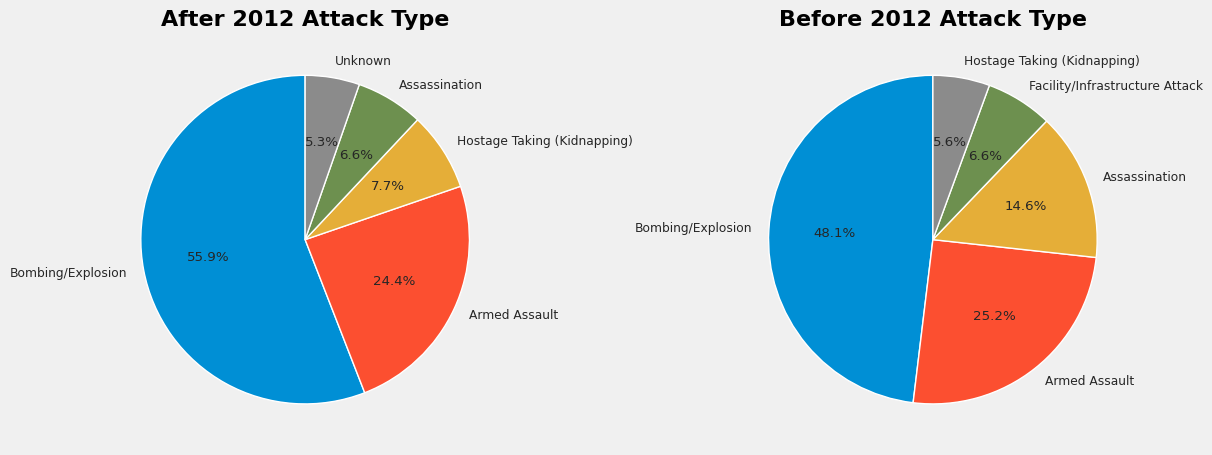

In [13]:
# 두 개의 서브플롯을 가진 그림 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.set(font_scale=0.8)
title_font = {'fontsize': 16, 'fontweight': 'bold'}


# 첫 번째 데이터프레임 사용
sizes1 = af2012_terror['AttackType'].value_counts()[:5]
axes[0].pie(sizes1, labels=sizes1.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('After 2012 Attack Type',fontdict=title_font)

# 두 번째 데이터프레임 사용
sizes2 = bf2012_terror['AttackType'].value_counts()[:5]
axes[1].pie(sizes2, labels=sizes2.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Before 2012 Attack Type',fontdict=title_font)

plt.tight_layout()
plt.show()


테러방법은 2012년 이후, 이전을 비교했을 때,  
상위 5개의 방법이 폭발물, 무장급습, 납치, 암살로 유사하며 그 비율 또한 큰 격차를 보이지 않는다

-> 테러방법이 달라져서 갑자기 테러수가 많아진것은 아님

지역이 달라졌나 ? 2012년 전-후 나라 비교

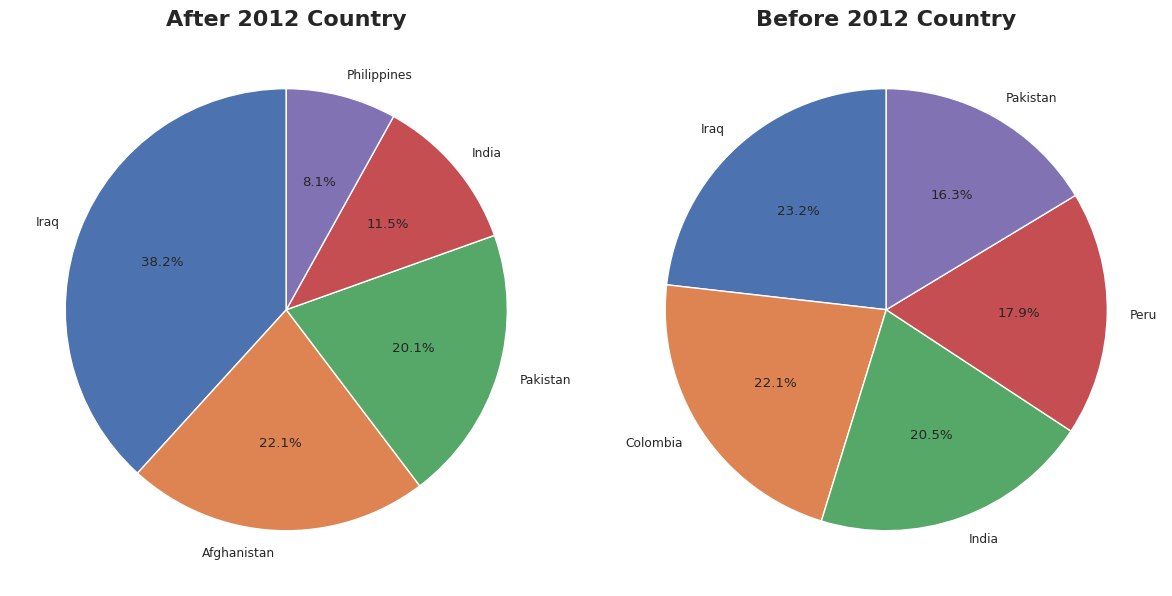

In [14]:
# 두 개의 서브플롯을 가진 그림 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.set(font_scale=0.8)
title_font = {'fontsize': 16, 'fontweight': 'bold'}


# 첫 번째 데이터프레임 사용
sizes1 = af2012_terror['Country'].value_counts()[:5]
axes[0].pie(sizes1, labels=sizes1.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('After 2012 Country',fontdict=title_font)

# 두 번째 데이터프레임 사용
sizes2 = bf2012_terror['Country'].value_counts()[:5]
axes[1].pie(sizes2, labels=sizes2.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Before 2012 Country',fontdict=title_font)



plt.tight_layout()
plt.show()

좀달라달라  
2012~ 이라크 분포가 꽤 커졌고 원래 없던 아프가니스탄 둥장  
나라와 상관관계를 알기전 이건 상위 다섯가지니까 지역별로 해서 묶어보기

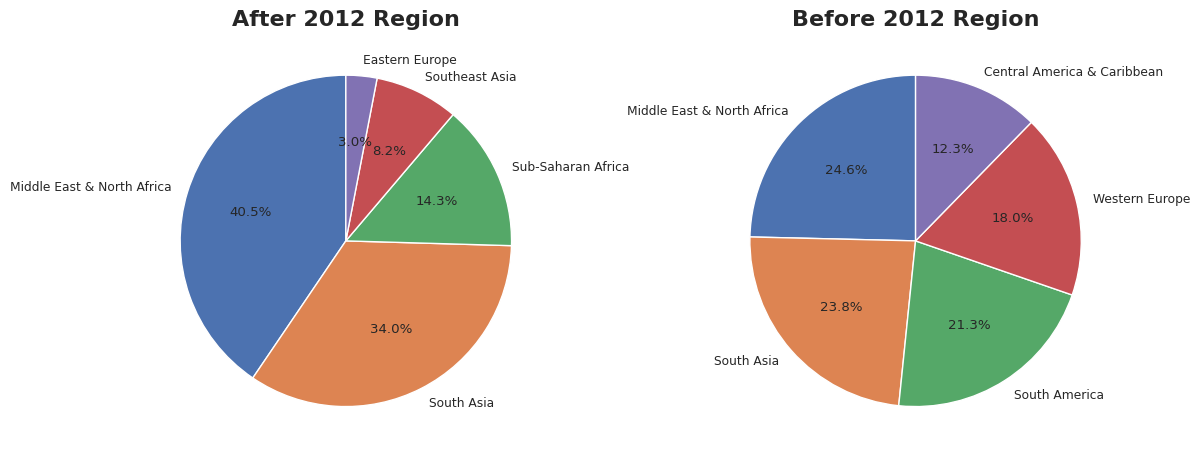

In [15]:
# 두 개의 서브플롯을 가진 그림 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.set(font_scale=0.8)
title_font = {'fontsize': 16, 'fontweight': 'bold'}


# 첫 번째 데이터프레임 사용
sizes1 = af2012_terror['Region'].value_counts()[:5]
axes[0].pie(sizes1, labels=sizes1.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('After 2012 Region',fontdict=title_font)

# 두 번째 데이터프레임 사용
sizes2 = bf2012_terror['Region'].value_counts()[:5]
axes[1].pie(sizes2, labels=sizes2.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Before 2012 Region',fontdict=title_font)


plt.tight_layout()
plt.show()

이렇게 보니 확실히 보이는군 ,,,,
중앙아시아와 북아프리카,남아시아에서 머선일이 일어난거야!!!!!!

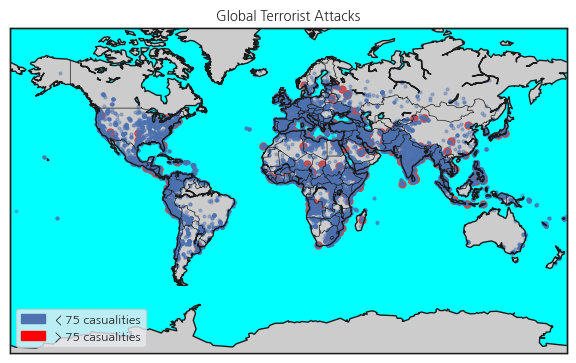

In [314]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(terror[terror['casualities']>=75].latitude) #사상자 75명 이상인 테러의 위도정보
long_100=list(terror[terror['casualities']>=75].longitude) #사상자 75명 이상인 테러의 위도정보 
x_100,y_100=m3(long_100,lat_100)# 근데 이제 저건 실제 위도 경도고 투영한 맵에 대한 위도 경도정보가 필요하기 때문에 투영지도의 좌표를 저장한 것(point)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r') #좌표 표시


lat_=list(terror[terror['casualities']<75].latitude) #75보다 적은 사상자 위도
long_=list(terror[terror['casualities']<75].longitude) #75보다 적은 사상자 경도
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)

m3.drawcoastlines() #해안선이랑 국경 그리기
m3.drawcountries()

m3.fillcontinents(lake_color='aqua') #육지영역 색칠 (lake 색상을 따로 지정가능)
m3.drawmapboundary(fill_color='aqua') #지도의 경계 그리고 지도 경계 내부 색칠
# fig=plt.gcf() #현재 지도 이미지 fig 에 저장 matplotlib에서 그림 다룰 때 유용하기 때문에

# fig.set_size_inches(10,6)
plt.title('Global Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 75 casualities"),
                    mpatches.Patch(color='red',label='> 75 casualities')])
plt.show()

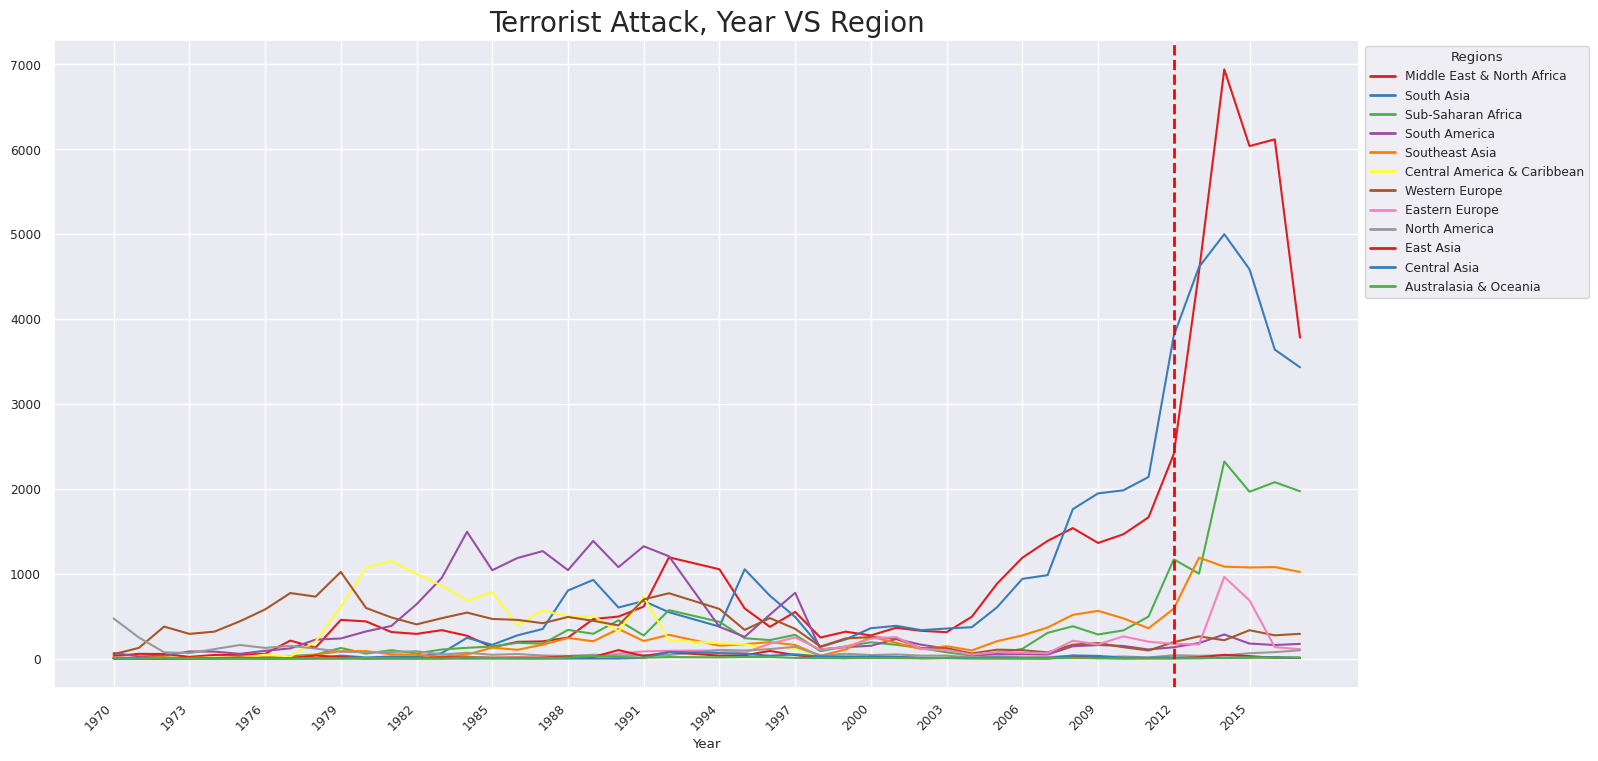

In [29]:
# Assuming df_region and terror are defined earlier in your code

# Create the crosstab and sort columns based on max values
df_region = pd.crosstab(terror.Year, terror.Region)
df_region = df_region[df_region.max().sort_values(ascending=False).index]

# Choose a distinct color palette with more variation
custom_palette = sns.color_palette('Set1', 12)

# Plot the sorted data
df_region.plot(color=custom_palette)

fig = plt.gcf()
plt.title("Terrorist Attack, Year VS Region", fontsize=20)
fig.set_size_inches(15, 8)

plt.xticks(range(1970, 2017, 3), rotation=45, ha='right')

# Add a red line at the year 2012
plt.axvline(x=2012, color='red', linestyle='--', linewidth=2)

# Customize the legend with distinct colors
legend_labels = df_region.columns
legend = plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title='Regions')

for i in range(len(legend_labels)):
    legend.get_lines()[i].set_linestyle('-')
    legend.get_lines()[i].set_linewidth(2)
    legend.get_lines()[i].set_color(custom_palette[i])

plt.show()

In [34]:
df_region.columns

Index(['Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa',
       'South America', 'Southeast Asia', 'Central America & Caribbean',
       'Western Europe', 'Eastern Europe', 'North America', 'East Asia',
       'Central Asia', 'Australasia & Oceania'],
      dtype='object', name='Region')

In [36]:
terror.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'casualities'],
      dtype='object')

2012년이후 중앙아시아 및 북아프리카 남아시아에서 눈에 띄게 테러가 급증한게 보임

그럼 2012년에 중앙아시아 및 북아프리카 지역에서 무슨일이 일어났길래....? 

어떤 나라들이 있지??


In [51]:
mid_est_nrh_afr = af2012_terror.loc[terror['Region'] == 'Middle East & North Africa', 'Country']


mid_est_nrh_afr

104784     Iraq
104789     Iraq
104791     Iraq
104792     Iraq
104801     Iraq
          ...  
181670     Iraq
181671     Iraq
181674     Iraq
181679     Iraq
181687    Syria
Name: Country, Length: 29839, dtype: object

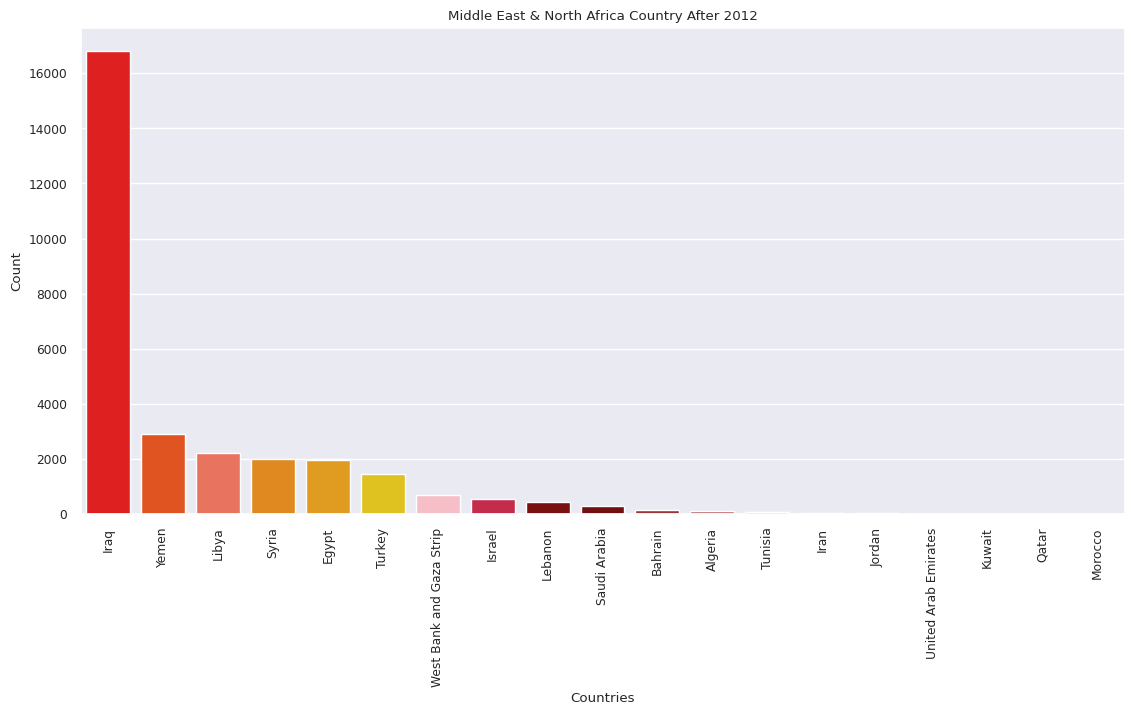

In [52]:
custom_palette = ['#FF0000', '#FF4500', '#FF6347', '#FF8C00', '#FFA500', '#FFD700', '#FFB6C1', '#DC143C', '#8B0000', '#800000', '#B22222', '#CD5C5C']

plt.subplots(figsize=(12, 6))

# Assuming mid_est_nrh_afr is your DataFrame
top_mid_east_nrh_afr = mid_est_nrh_afr.value_counts().reset_index()
top_mid_east_nrh_afr.columns = ['Country', 'Counts']
# 
# Use the custom palette in the sns.barplot
sns.barplot(x='Country', y='Counts', data=top_mid_east_nrh_afr, palette=custom_palette)

plt.title('Middle East & North Africa Country After 2012')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

범인은.....중앙아시아 너, 이라크

남아시아에서도 찾아볼까?

In [56]:
sth_asia = af2012_terror.loc[terror['Region'] == 'South Asia', 'Country']


sth_asia 

104778       Pakistan
104780       Pakistan
104782       Pakistan
104783       Pakistan
104785    Afghanistan
             ...     
181676    Afghanistan
181683    Afghanistan
181684          India
181685    Afghanistan
181689          India
Name: Country, Length: 25067, dtype: object

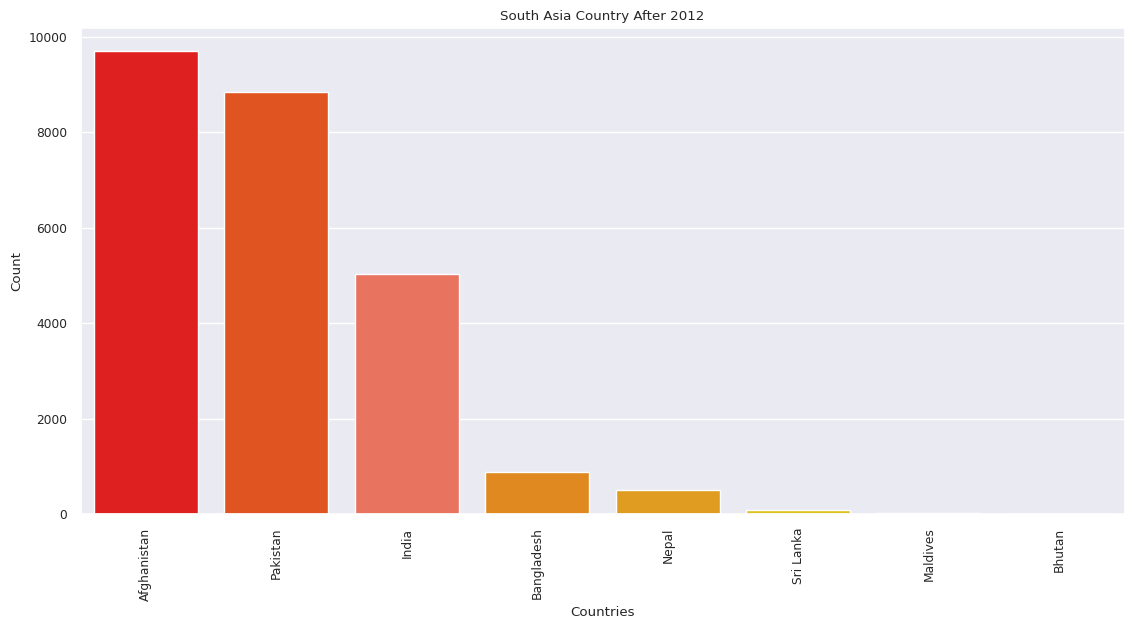

In [57]:
custom_palette = ['#FF0000', '#FF4500', '#FF6347', '#FF8C00', '#FFA500', '#FFD700', '#FFB6C1', '#DC143C', '#8B0000', '#800000', '#B22222', '#CD5C5C']

plt.subplots(figsize=(12, 6))

# Assuming mid_est_nrh_afr is your DataFrame
top_sth_asia = sth_asia.value_counts().reset_index()
top_sth_asia.columns = ['Country', 'Counts']
# 
# Use the custom palette in the sns.barplot
sns.barplot(x='Country', y='Counts', data=top_sth_asia, palette=custom_palette)

plt.title('South Asia Country After 2012')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

아프가니스탄,파키스탄,인디아 요 삼인방....

주요 f4 아니 T4 : 이라크 (남바완), 아프가니스탄,파키스탄, 인디아

무슨일이 일어났니..... 전체 기간에서 구한 TOP 10에서도 동일한 결과이다

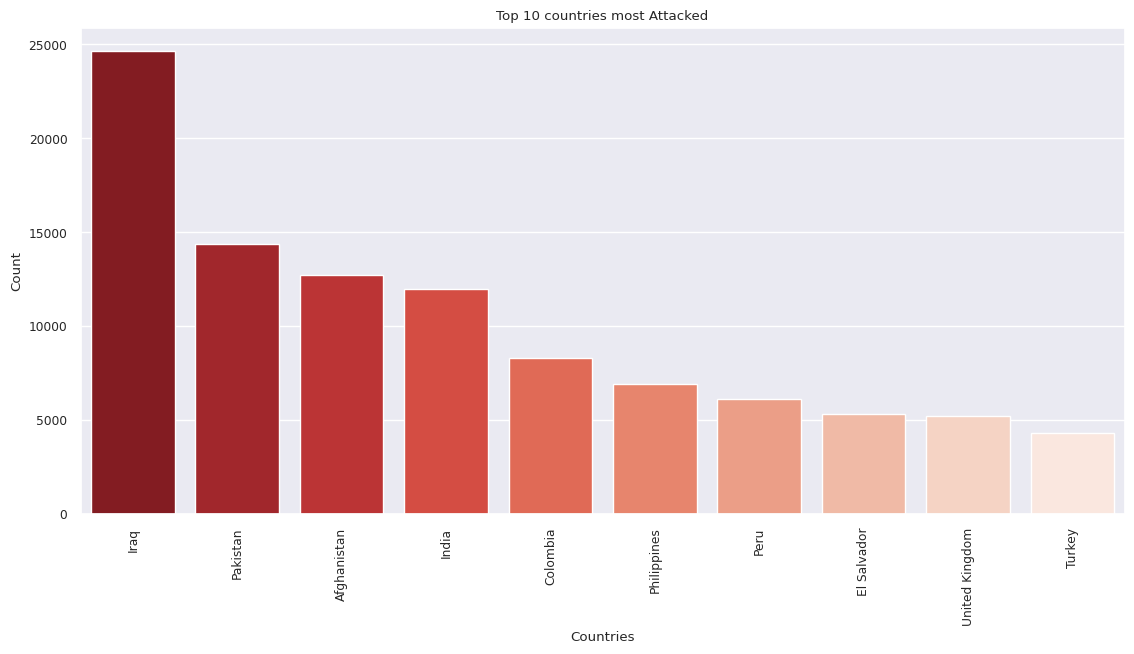

In [60]:
plt.subplots(figsize=(12,6))
top_countries=terror['Country'].value_counts()[:10].to_frame().reset_index()
top_countries.columns= ['Country','Attacks_Counts']
sns.barplot(x='Country',y='Attacks_Counts', data= top_countries, palette='Reds_r')
plt.title('Top 10 countries most Attacked')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

top 3의 테러방법/테러대상/테러 동기

In [99]:
iraq_terror = af2012_terror[af2012_terror['Country'] >= 'Iraq']
afg_terror = af2012_terror[af2012_terror['Country'] >= 'Afghanistan']
pak_terror = af2012_terror[af2012_terror['Country'] >= 'Pakistan']

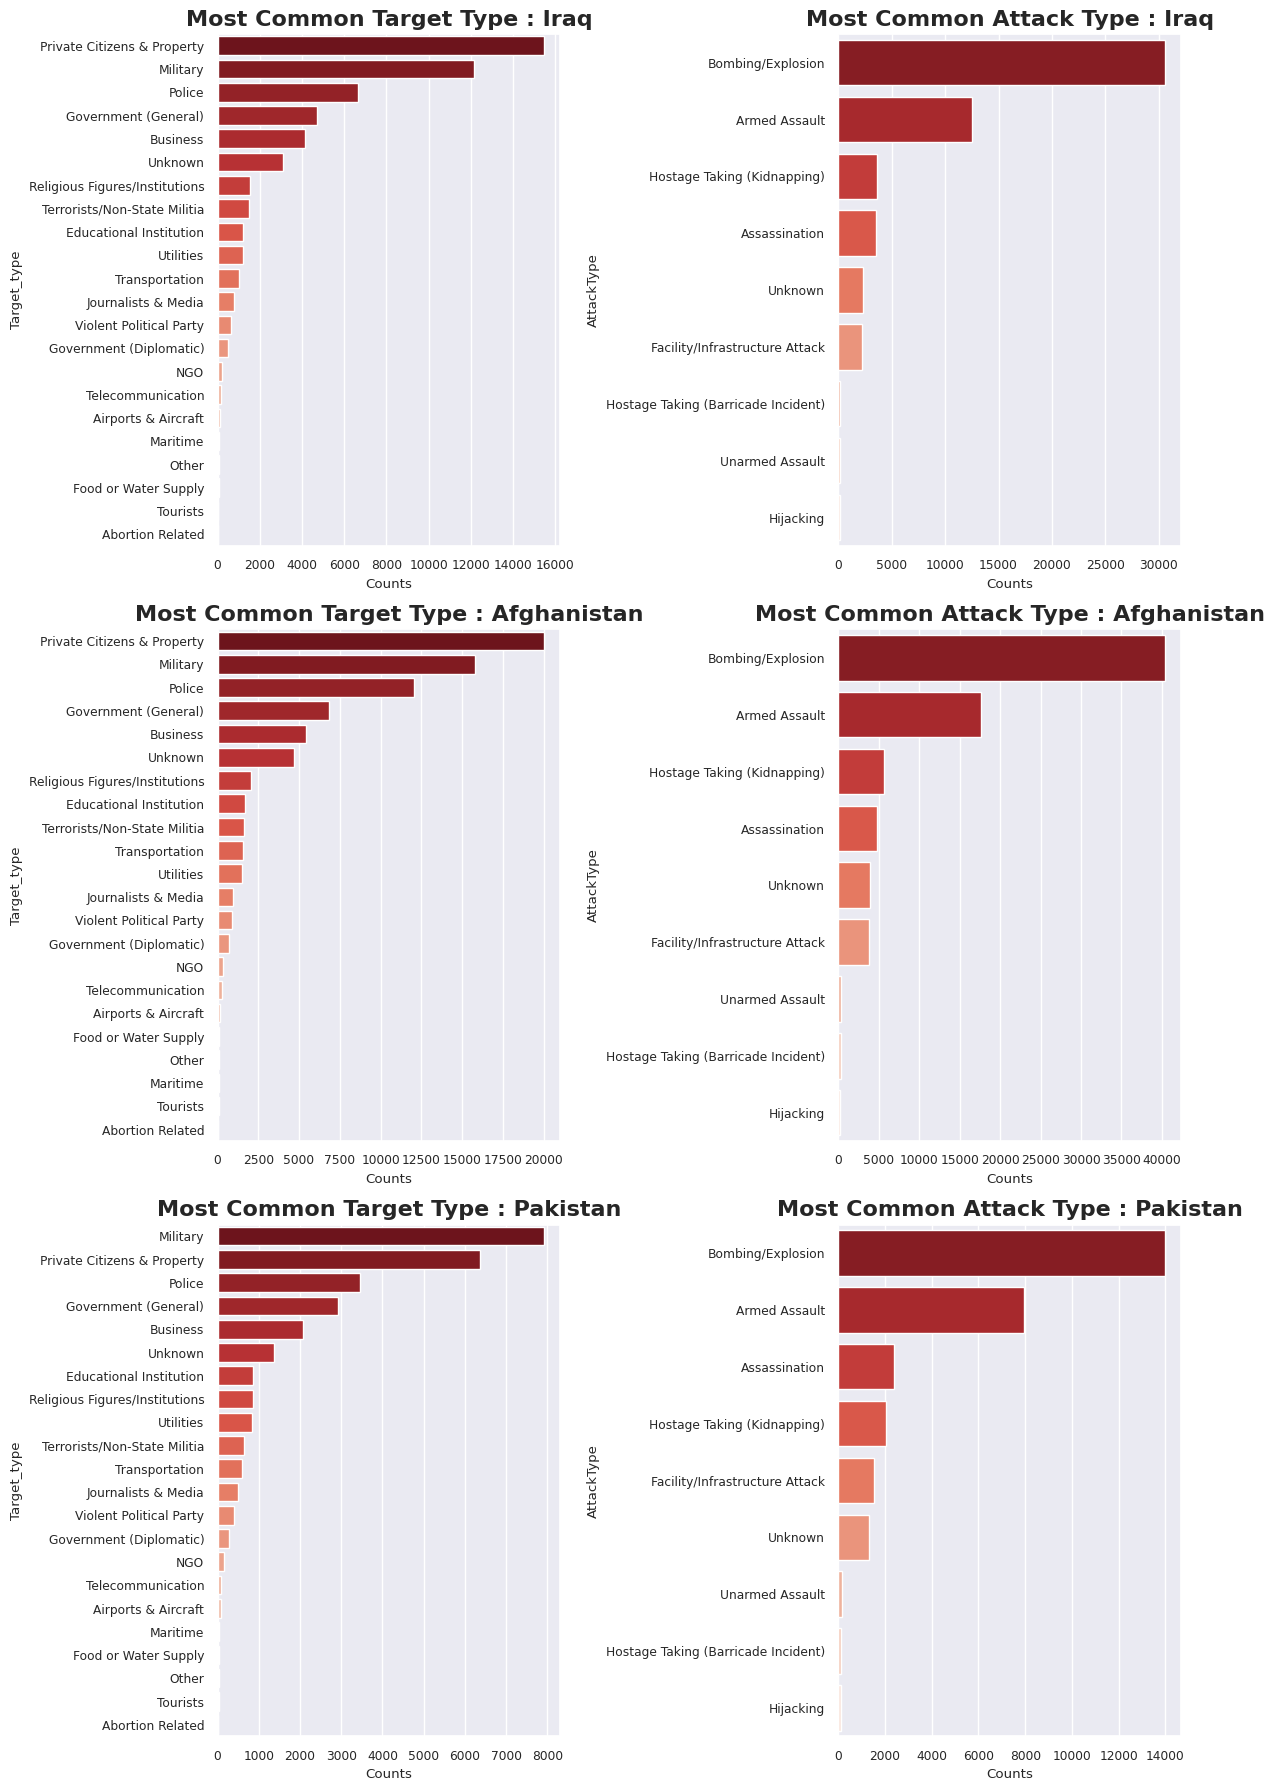

In [105]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
sns.set(font_scale=0.8)
title_font = {'fontsize': 16, 'fontweight': 'bold'}


iraq_tg = iraq_terror['Target_type'].value_counts().to_frame().reset_index()
iraq_tg.columns= ['Target_type','Counts']
sns.barplot(x='Counts',y='Target_type', data= iraq_tg, palette='Reds_r',ax=axes[0,0])
axes[0,0].set_title('Most Common Target Type : Iraq',fontdict=title_font)

# # 두 번째 데이터프레임 사용
iraq_att = iraq_terror['AttackType'].value_counts().to_frame().reset_index()
iraq_att.columns= ['AttackType','Counts']
sns.barplot(x='Counts',y='AttackType', data= iraq_att, palette='Reds_r',ax=axes[0,1])
axes[0,1].set_title('Most Common Attack Type : Iraq',fontdict=title_font)


afg_tg = afg_terror['Target_type'].value_counts().to_frame().reset_index()
afg_tg.columns= ['Target_type','Counts']
sns.barplot(x='Counts',y='Target_type', data= afg_tg, palette='Reds_r',ax=axes[1,0])
axes[1,0].set_title('Most Common Target Type : Afghanistan',fontdict=title_font)

# # 두 번째 데이터프레임 사용
afg_att = afg_terror['AttackType'].value_counts().to_frame().reset_index()
afg_att.columns= ['AttackType','Counts']
sns.barplot(x='Counts',y='AttackType', data= afg_att, palette='Reds_r',ax=axes[1,1])
axes[1,1].set_title('Most Common Attack Type : Afghanistan',fontdict=title_font)



pak_tg = pak_terror['Target_type'].value_counts().to_frame().reset_index()
pak_tg.columns= ['Target_type','Counts']
sns.barplot(x='Counts',y='Target_type', data= pak_tg, palette='Reds_r',ax=axes[2,0])
axes[2,0].set_title('Most Common Target Type : Pakistan',fontdict=title_font)

# # 두 번째 데이터프레임 사용
pak_att = pak_terror['AttackType'].value_counts().to_frame().reset_index()
pak_att.columns= ['AttackType','Counts']
sns.barplot(x='Counts',y='AttackType', data= pak_att, palette='Reds_r',ax=axes[2,1])
axes[2,1].set_title('Most Common Attack Type : Pakistan',fontdict=title_font)



plt.tight_layout()
plt.show()


In [116]:
iraq_terror.head(3)

Year  Month  Day   Country              Region     city   latitude  \
104778  2012      1    1  Pakistan          South Asia   Quetta  30.200819   
104779  2012      1    1     Kenya  Sub-Saharan Africa  Garissa  -0.456120   
104780  2012      1    1  Pakistan          South Asia      Sui  28.633307   

        longitude         AttackType  Killed  Wounded     Target  \
104778  66.994354  Bombing/Explosion     0.0     12.0  Paan Shop   
104779  39.646123      Armed Assault     3.0     14.0        Bar   
104780  69.190369  Bombing/Explosion     4.0      3.0   Soldiers   

                                                  Summary  \
104778  01/01/2012: A grenade was thrown into a shop o...   
104779  01/01/2012: Assailants threw two grenades and ...   
104780  01/01/2012: A convoy of Frontier Corps (FC) so...   

                               Group Target_type Weapon_type  \
104778                       Unknown    Business  Explosives   
104779                    Al-Shabaab    Business  Explosives   
104780  Baloch Republican Army (BRA)    Military  Explosives   

                                                   Motive  casualities  
104778                                                NaN         12.0  
104779  The specific motive is unknown; however, Al-Sh...         17.0  
104780                                                NaN          7.0

Top 10 countries most Attacked

In [120]:
# 'casualities' 열을 기준으로 상위 10개 행을 찾음
iraq_casualty_by_group = iraq_terror.groupby('Group')['casualities'].sum().nlargest(10).reset_index()
iraq_casualty_by_group

Group  casualities
0                                      Unknown      99244.0
1  Islamic State of Iraq and the Levant (ISIL)      57277.0
2                                   Boko Haram      16446.0
3                                   Al-Shabaab      12373.0
4              Tehrik-i-Taliban Pakistan (TTP)       8567.0
5              Houthi extremists (Ansar Allah)       5422.0
6     Al-Qaida in the Arabian Peninsula (AQAP)       4899.0
7                             Al-Qaida in Iraq       4885.0
8               Kurdistan Workers' Party (PKK)       4127.0
9                              Al-Nusrah Front       3340.0

이라크 범인,,,, ISIL, 보코하람, 알샤바브 이슬람 극단주의 테러조직

In [122]:
afg_casualty_by_group = afg_terror.groupby('Group')['casualities'].sum().nlargest(10).reset_index()
afg_casualty_by_group

Group  casualities
0                                      Unknown     119353.0
1  Islamic State of Iraq and the Levant (ISIL)      58223.0
2                                      Taliban      45462.0
3                                   Boko Haram      19328.0
4                                   Al-Shabaab      12395.0
5              Tehrik-i-Taliban Pakistan (TTP)       8605.0
6              Houthi extremists (Ansar Allah)       5422.0
7     Al-Qaida in the Arabian Peninsula (AQAP)       4923.0
8        Khorasan Chapter of the Islamic State       4902.0
9                             Al-Qaida in Iraq       4885.0

아프가니스탄 : ISIL, 탈레반, 보코하람, 이슬람 극단주의 테러조직

In [123]:
pak_casualty_by_group = pak_terror.groupby('Group')['casualities'].sum().nlargest(10).reset_index()
pak_casualty_by_group

Group  casualities
0                                      Unknown      31630.0
1                                   Al-Shabaab      10205.0
2  Islamic State of Iraq and the Levant (ISIL)       9343.0
3              Tehrik-i-Taliban Pakistan (TTP)       8567.0
4              Houthi extremists (Ansar Allah)       5422.0
5     Al-Qaida in the Arabian Peninsula (AQAP)       4899.0
6               Kurdistan Workers' Party (PKK)       4101.0
7                              Al-Nusrah Front       3135.0
8                    Donetsk People's Republic       2701.0
9                            Lashkar-e-Jhangvi       2363.0

파키스탄 : 소말리아 무장테러단체 알샤바브,탈레반 극단주의 테러조직

그럼 어떤 피해가 있지???????????????

In [137]:
youtube_links = [
    "https://www.youtube.com/watch?v=ac6dlI2pyjw",
    "https://www.youtube.com/watch?v=Gxu6StNJ4zM",
    "https://www.youtube.com/watch?v=QhLEbXxHkcw",
    # 추가 링크들
]

# 링크를 저장할 파일 경로 및 파일명
file_path = '/home/min/dev_ws/EDA/source/0.task/youtube_links.txt'

# 링크를 파일에 쓰기
with open(file_path, 'w') as file:
    for link in youtube_links:
        file.write(link + '\n')

print(f'YouTube 영상 링크가 {file_path}에 저장되었습니다.')

YouTube 영상 링크가 /home/min/dev_ws/EDA/source/0.task/youtube_links.txt에 저장되었습니다.


In [138]:
with open(file_path, 'r') as file:
    # 파일 내용 읽기
    youtube_links = file.readlines()

# 각 링크 출력
for link in youtube_links:
    print(link.strip())  # strip()을 사용하여 줄바꿈 문자 제거

https://www.youtube.com/watch?v=ac6dlI2pyjw
https://www.youtube.com/watch?v=Gxu6StNJ4zM
https://www.youtube.com/watch?v=QhLEbXxHkcw


In [141]:
Killed_terror = terror.sort_values(by='Killed', ascending=False)

In [143]:
Killed_terror.head(5)

Year  Month  Day        Country                      Region  \
133518  2014      6   12           Iraq  Middle East & North Africa   
73126   2001      9   11  United States               North America   
73127   2001      9   11  United States               North America   
55934   1994      4   13         Rwanda          Sub-Saharan Africa   
136283  2014      8    3           Iraq  Middle East & North Africa   

                 city   latitude  longitude                   AttackType  \
133518         Tikrit  34.621521  43.668377  Hostage Taking (Kidnapping)   
73126   New York City  40.697132 -73.931351                    Hijacking   
73127   New York City  40.697132 -73.931351                    Hijacking   
55934          Gikoro  -1.932787  30.332456                Armed Assault   
136283         Sinjar  36.319386  41.861473  Hostage Taking (Kidnapping)   

        Killed  Wounded                                             Target  \
133518  1570.0      NaN                                           Soldiers   
73126   1384.0   8190.0  Passengers and crew members on American Airlin...   
73127   1383.0   8191.0  Passengers and crew members on United Airlines...   
55934   1180.0      0.0     Group of Tutsi Refugees inside Catholic Church   
136283   953.0      NaN                                   Yizidi Civilians   

                                                  Summary  \
133518  06/12/2014: Assailants abducted approximately ...   
73126   09/11/2001: This was one of four related attac...   
73127   09/11/2001: This was one of four related attac...   
55934                                                 NaN   
136283  08/03/2014: Assailants attacked Yizidi civilia...   

                                              Group  \
133518  Islamic State of Iraq and the Levant (ISIL)   
73126                                      Al-Qaida   
73127                                      Al-Qaida   
55934                               Hutu extremists   
136283  Islamic State of Iraq and the Levant (ISIL)   

                        Target_type  \
133518                     Military   
73126   Private Citizens & Property   
73127   Private Citizens & Property   
55934   Private Citizens & Property   
136283  Private Citizens & Property   

                                              Weapon_type  \
133518                                           Firearms   
73126   Vehicle (not to include vehicle-borne explosiv...   
73127   Vehicle (not to include vehicle-borne explosiv...   
55934                                            Firearms   
136283                                            Unknown   

                                                   Motive  casualities  
133518  The Islamic State of Iraq and the Levant (ISIL...          NaN  
73126                                             Unknown       9574.0  
73127                                             Unknown       9574.0  
55934                                                 NaN       1180.0  
136283  The specific motive is unknown; however, sourc...          NaN

순서대로, 
2014년 6월 북부 이라크 공세(isil)  
911 -> 알카에다   
르완다 후투족 내전  
이라크 예지디 학살  

In [144]:
from bs4 import BeautifulSoup
import urllib
from urllib.request import Request
from urllib.request import urlopen
import pandas as pd

# 911 희생자 확인(feat.beatifulSoup)

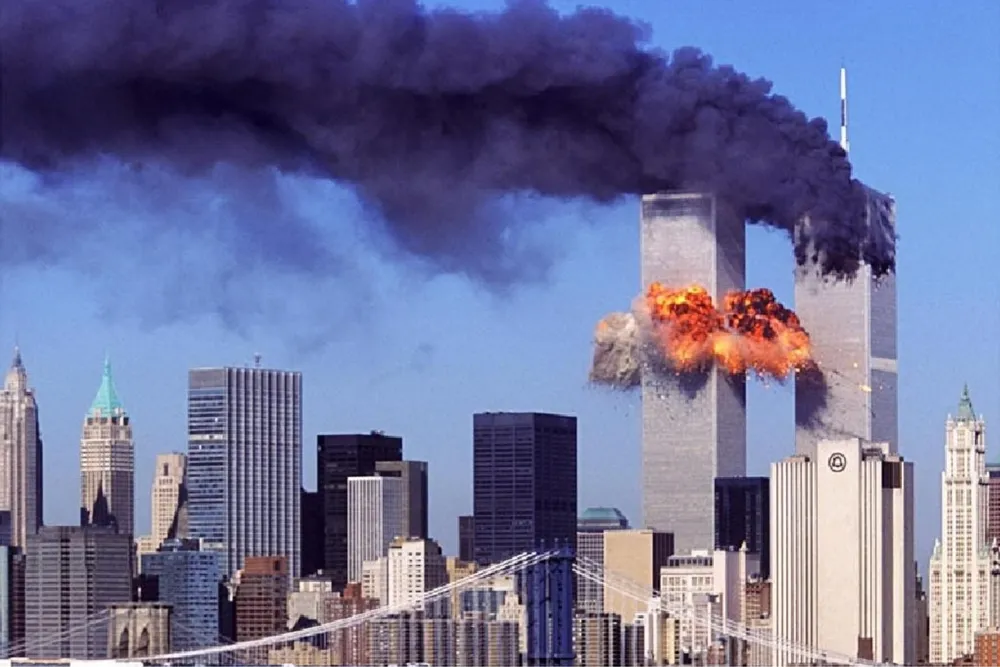

In [157]:
url = "https://en.wikipedia.org/wiki/List_of_victims_of_the_September_11_attacks_(A%E2%80%93G)"
page = urlopen(url)

soup = BeautifulSoup(page, "html.parser", from_encoding='cp949')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of victims of the September 11 attacks (A–G) - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-client

In [164]:
victims

[<table class="vertical-align-top sortable wikitable">
 <tbody><tr>
 <th>Name</th>
 <th>Age</th>
 <th>Place</th>
 <th>Town/City</th>
 <th>Province/State</th>
 <th>Country</th>
 <th>Job</th>
 <th>Employer
 </th></tr>
 <tr>
 <th><sup class="reference" id="cite_ref-Memorial_1-1"><a href="#cite_note-Memorial-1">[1]</a></sup><sup class="reference" id="cite_ref-CNN_3-0"><a href="#cite_note-CNN-3">[3]</a></sup><sup class="reference" id="cite_ref-WSFA_4-0"><a href="#cite_note-WSFA-4">[4]</a></sup></th>
 <th><sup class="reference" id="cite_ref-CNN_3-1"><a href="#cite_note-CNN-3">[3]</a></sup><sup class="reference" id="cite_ref-WSFA_4-1"><a href="#cite_note-WSFA-4">[4]</a></sup></th>
 <th><sup class="reference" id="cite_ref-ABC7NY_5-0"><a href="#cite_note-ABC7NY-5">[5]</a></sup><sup class="reference" id="cite_ref-FOX_6-0"><a href="#cite_note-FOX-6">[6]</a></sup><sup class="reference" id="cite_ref-Metro_7-0"><a href="#cite_note-Metro-7">[7]</a></sup><sup class="reference" id="cite_ref-Newstalk_8-

In [207]:
victims_list=[]
for row in victims:
    # 각 행에서 <td> 태그를 찾아서 텍스트 값을 가져오기
    data_cells = row.find_all('td')

    # 각 행에서 6개씩 데이터를 나눠 가져오기
    for idx in range(0, len(data_cells), 8):
        six_cells_data = data_cells[idx:idx+8]
        
        # 가져온 6개의 데이터를 리스트에 저장
        six_cells_data_text = [cell.get_text(strip=True) for cell in six_cells_data]
        victims_list.append(six_cells_data_text)



In [218]:
df_911=pd.DataFrame(victims_list)

In [219]:
df_911

0     1     2  \
0                           Gordon McCannel Aamoth, Jr.    32   WTC   
1                                         Edelmiro Abad    54   WTC   
2                                       Marie Rose Abad    49   WTC   
3                                  Andrew Anthony Abate    37   WTC   
4                                    Vincent Paul Abate    40   WTC   
...                                                 ...   ...   ...   
1067                               Janet Ruth Gustafson    48   WTC   
1068                                     Philip T. Guza    54   WTC   
1069                                   Barbara Guzzardo    49   WTC   
1070                               Peter Mark Gyulavary    44   WTC   
1071  Continued atList of victims of the September 1...  None  None   

               3           4              5                       6  \
0      Manhattan    New York  United States       investment banker   
1       Brooklyn    New York  United States   senior vice president   
2        Syosset    New York  United States   senior vice president   
3       Melville    New York  United States             bond trader   
4       Brooklyn    New York  United States             bond trader   
...          ...         ...            ...                     ...   
1067   Manhattan    New York  United States                           
1068  Sea Bright  New Jersey  United States       client specialist   
1069    Glendale    New York  United States   insurance underwriter   
1070     Warwick    New York  United States  environmental engineer   
1071        None        None           None                    None   

                                   7  
0                    Sandler O'Neill  
1      Fiduciary Trust International  
2                                KBW  
3                  Cantor Fitzgerald  
4                  Cantor Fitzgerald  
...                              ...  
1067                             Aon  
1068                             Aon  
1069                             Aon  
1070  Washington Group International  
1071                            None  

[1072 rows x 8 columns]

In [220]:
df_911.rename(columns={0: 'Name',
                   1 : 'Age',
                   2 : 'Place',
                   3 : "City",
                   4 : 'State',
                   5 : 'Country',
                   6 : 'Job',
                   7 : 'Employer'}, inplace=True)

In [221]:
df_911.columns

Index(['Name', 'Age', 'Place', 'City', 'State', 'Country', 'Job', 'Employer'], dtype='object')

In [222]:
df_911

Name   Age Place  \
0                           Gordon McCannel Aamoth, Jr.    32   WTC   
1                                         Edelmiro Abad    54   WTC   
2                                       Marie Rose Abad    49   WTC   
3                                  Andrew Anthony Abate    37   WTC   
4                                    Vincent Paul Abate    40   WTC   
...                                                 ...   ...   ...   
1067                               Janet Ruth Gustafson    48   WTC   
1068                                     Philip T. Guza    54   WTC   
1069                                   Barbara Guzzardo    49   WTC   
1070                               Peter Mark Gyulavary    44   WTC   
1071  Continued atList of victims of the September 1...  None  None   

            City       State        Country                     Job  \
0      Manhattan    New York  United States       investment banker   
1       Brooklyn    New York  United States   senior vice president   
2        Syosset    New York  United States   senior vice president   
3       Melville    New York  United States             bond trader   
4       Brooklyn    New York  United States             bond trader   
...          ...         ...            ...                     ...   
1067   Manhattan    New York  United States                           
1068  Sea Bright  New Jersey  United States       client specialist   
1069    Glendale    New York  United States   insurance underwriter   
1070     Warwick    New York  United States  environmental engineer   
1071        None        None           None                    None   

                            Employer  
0                    Sandler O'Neill  
1      Fiduciary Trust International  
2                                KBW  
3                  Cantor Fitzgerald  
4                  Cantor Fitzgerald  
...                              ...  
1067                             Aon  
1068                             Aon  
1069                             Aon  
1070  Washington Group International  
1071                            None  

[1072 rows x 8 columns]

In [240]:
# Assuming 'Age' is a column in your DataFrame df_911
# Convert 'Age' column to numeric if it's not already
df_911['Age'] = pd.to_numeric(df_911['Age'], errors='coerce')

# Define bins and labels
bins = [0, 18, 25, 35, 45, 55, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56+']

# Create a new column 'AgeGroup' in df_911 based on the bins and labels
df_911['AgeGroup'] = pd.cut(df_911['Age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
df_911

Name   Age Place  \
0                           Gordon McCannel Aamoth, Jr.  32.0   WTC   
1                                         Edelmiro Abad  54.0   WTC   
2                                       Marie Rose Abad  49.0   WTC   
3                                  Andrew Anthony Abate  37.0   WTC   
4                                    Vincent Paul Abate  40.0   WTC   
...                                                 ...   ...   ...   
1067                               Janet Ruth Gustafson  48.0   WTC   
1068                                     Philip T. Guza  54.0   WTC   
1069                                   Barbara Guzzardo  49.0   WTC   
1070                               Peter Mark Gyulavary  44.0   WTC   
1071  Continued atList of victims of the September 1...   NaN  None   

            City       State        Country                     Job  \
0      Manhattan    New York  United States       investment banker   
1       Brooklyn    New York  United States   senior vice president   
2        Syosset    New York  United States   senior vice president   
3       Melville    New York  United States             bond trader   
4       Brooklyn    New York  United States             bond trader   
...          ...         ...            ...                     ...   
1067   Manhattan    New York  United States                           
1068  Sea Bright  New Jersey  United States       client specialist   
1069    Glendale    New York  United States   insurance underwriter   
1070     Warwick    New York  United States  environmental engineer   
1071        None        None           None                    None   

                            Employer AgeGroup  
0                    Sandler O'Neill    26-35  
1      Fiduciary Trust International    46-55  
2                                KBW    46-55  
3                  Cantor Fitzgerald    36-45  
4                  Cantor Fitzgerald    36-45  
...                              ...      ...  
1067                             Aon    46-55  
1068                             Aon    46-55  
1069                             Aon    46-55  
1070  Washington Group International    36-45  
1071                            None      NaN  

[1072 rows x 9 columns]

In [230]:
df_ages

Count
Age         
18-24    100
25-34    150
35-44     80
45-54     50

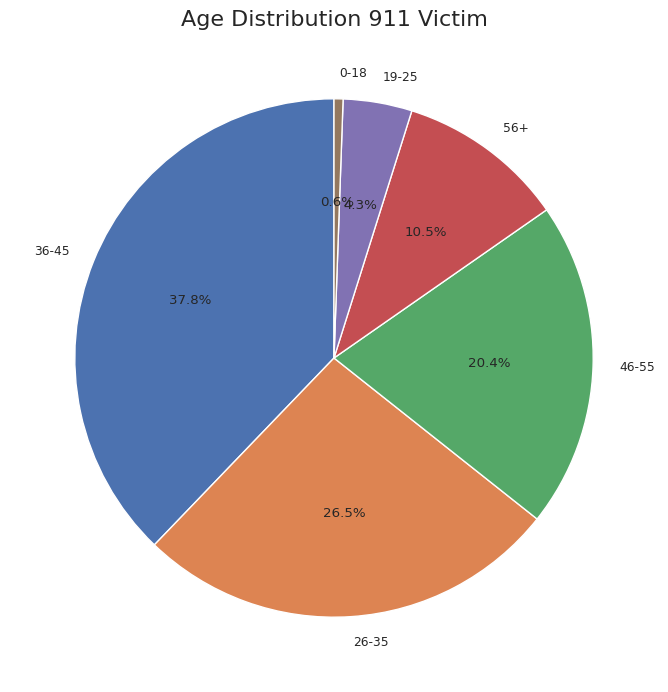

In [260]:
vic_age = df_911["AgeGroup"].value_counts().reset_index()
vic_age
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(vic_age["count"], labels=vic_age["AgeGroup"],autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution 911 Victim', fontsize=16)
plt.show()



26~45 세의 청년층이 피해자의 65퍼센트 차지한다(내 또래,,!포함)

In [271]:
vic_job = df_911["Job"].value_counts()[:6].reset_index()
vic_job=vic_job[1:]



In [273]:
vic_job

Job  count
1         vice president     33
2  senior vice president     26
3             accountant     24
4                 broker     20
5            bond broker     19

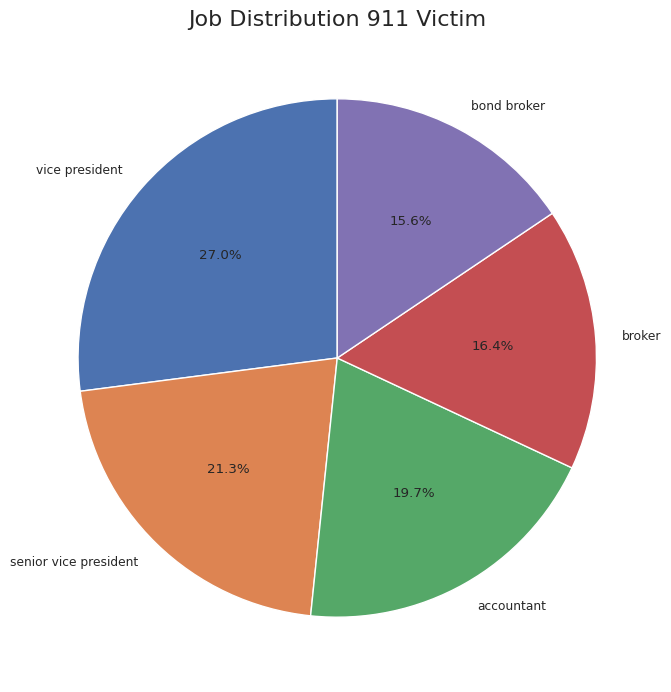

In [275]:
plt.figure(figsize=(8, 8))
plt.pie(vic_job["count"], labels=vic_job["Job"], autopct='%1.1f%%', startangle=90)
plt.title('Job Distribution 911 Victim', fontsize=16)
plt.show()

중책에 있는 사람들이 많이 희생당했음 테러 발생 빌딩 특성상 회계사도 많은 비율을 차지

이쯤 되면 궁금한 한국의 테러!!

In [282]:
korea_terror_freq = terror[terror['Country'] == 'South Korea'].shape[0]

# 전체 국가의 테러 발생 빈도를 확인하고 한국의 등수 확인
country_freq = terror['Country'].value_counts().reset_index()
country_freq.columns = ['Country', 'Frequency']

total_countries = terror['Country'].nunique()
korea_rank = country_freq[country_freq['Country'] == 'South Korea'].index[0] + 1

# 결과 출력
print(f"한국의 테러 발생 빈도: {korea_terror_freq} 건")
print(f"테러 발생 {total_countries}개국 중에서 한국의 등수: {korea_rank} 등")

print(f"테러 발생 국가 중 한국은 상위 {int((1-korea_rank/total_countries)* 100)}%")

한국의 테러 발생 빈도: 38 건
테러 발생 205개국 중에서 한국의 등수: 117 등
테러 발생 국가 중 한국은 상위 42%


생각보다 많이 일어났네...?

In [294]:
korea_terror = terror[terror['Country'] == 'South Korea']
korea_terror

Year  Month  Day      Country     Region                         city  \
2514    1974      8   15  South Korea  East Asia                        Seoul   
15734   1982      3   18  South Korea  East Asia                        Busan   
19820   1983      9   22  South Korea  East Asia                        Daegu   
29151   1986      9   14  South Korea  East Asia  Gimpo International Airport   
29696   1986     12   15  South Korea  East Asia                        Busan   
33678   1988      3    4  South Korea  East Asia                        Busan   
33835   1988      3   18  South Korea  East Asia                        Seoul   
34532   1988      5   23  South Korea  East Asia                      Gwangju   
34562   1988      5   26  South Korea  East Asia                        Seoul   
34737   1988      6   13  South Korea  East Asia                        Daegu   
35205   1988      7   26  South Korea  East Asia                        Seoul   
35769   1988      9   30  South Korea  East Asia                        Seoul   
35930   1988     10   14  South Korea  East Asia                      Gwangju   
38466   1989      5   30  South Korea  East Asia                   Pyeongtaek   
42029   1990      4    3  South Korea  East Asia                        Seoul   
42459   1990      5   11  South Korea  East Asia                        Seoul   
42667   1990      5   26  South Korea  East Asia                        Seoul   
46079   1991      4    8  South Korea  East Asia                      Incheon   
46328   1991      5    4  South Korea  East Asia                        Seoul   
46979   1991      6   28  South Korea  East Asia                      Gwangju   
47289   1991      7   18  South Korea  East Asia                      Gwangju   
48876   1991     11    1  South Korea  East Asia                        Seoul   
49074   1991     11   14  South Korea  East Asia                      Gwangju   
51446   1992      5   14  South Korea  East Asia                     Muan-gun   
52432   1992      8    4  South Korea  East Asia                    Uijeongbu   
53149   1992      9   23  South Korea  East Asia                      Incheon   
56923   1994      7   27  South Korea  East Asia                     Seongnam   
56986   1994      8    4  South Korea  East Asia                        Seoul   
58303   1995      1   19  South Korea  East Asia                      Gwangju   
59174   1995      5   16  South Korea  East Asia                      Incheon   
59403   1995      6    0  South Korea  East Asia                        Seoul   
60679   1995     10   16  South Korea  East Asia                        Seoul   
63098   1996      8   13  South Korea  East Asia                        Seoul   
71833   2001      2    3  South Korea  East Asia                        Daegu   
76029   2003     11   17  South Korea  East Asia                         Buan   
80737   2006      5   20  South Korea  East Asia                        Seoul   
145254  2015      3    5  South Korea  East Asia                        Seoul   
169965  2016     12    1  South Korea  East Asia                         Gumi   

         latitude   longitude                      AttackType  Killed  \
2514    37.566535  126.977969                   Assassination     1.0   
15734   35.179554  129.075642  Facility/Infrastructure Attack     1.0   
19820   35.871435  128.601445               Bombing/Explosion     1.0   
29151   37.558947  126.798341               Bombing/Explosion     5.0   
29696   35.179554  129.075642                   Armed Assault     0.0   
33678   35.179554  129.075642               Bombing/Explosion     0.0   
33835   37.566535  126.977969  Facility/Infrastructure Attack     0.0   
34532   35.159545  126.852601  Facility/Infrastructure Attack     0.0   
34562   37.566535  126.977969  Facility/Infrastructure Attack     0.0   
34737   35.871435  128.601445  Facility/Infrastructure Attack     0.0   
35205   37.566535  126.977969               B

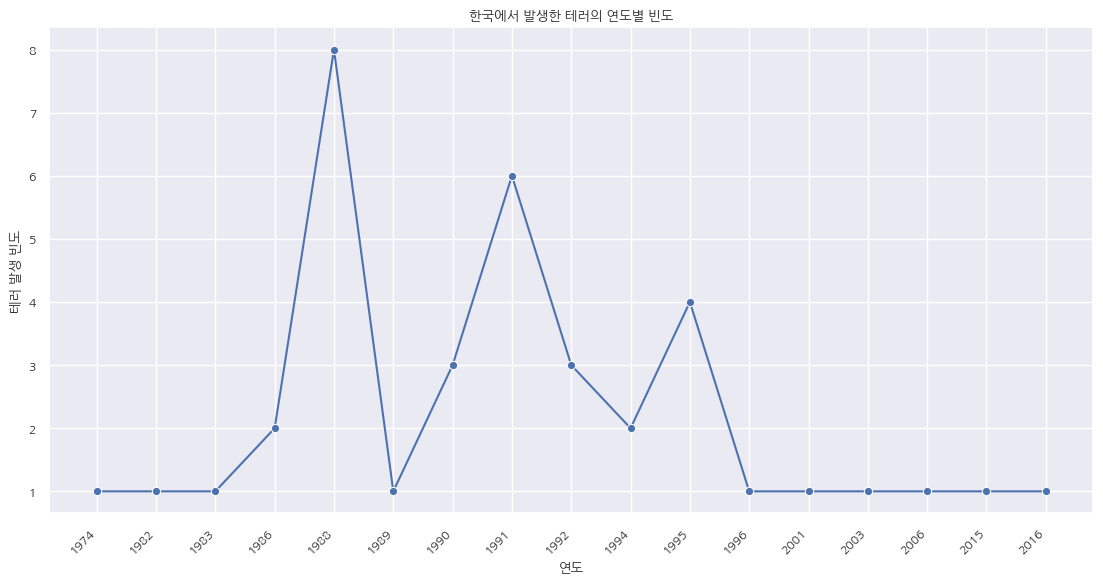

In [295]:

import koreanize_matplotlib
y_korea_terror = korea_terror['Year'].value_counts().sort_index()

# 그래프 생성
plt.figure(figsize=(12, 6))
sns.lineplot(x=y_korea_terror.index.astype(str), y=y_korea_terror.values, marker='o')
plt.title('한국에서 발생한 테러의 연도별 빈도')
plt.xlabel('연도')
plt.ylabel('테러 발생 빈도')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # x축 눈금 각도 조절
plt.show()

사상자도 한번 보자

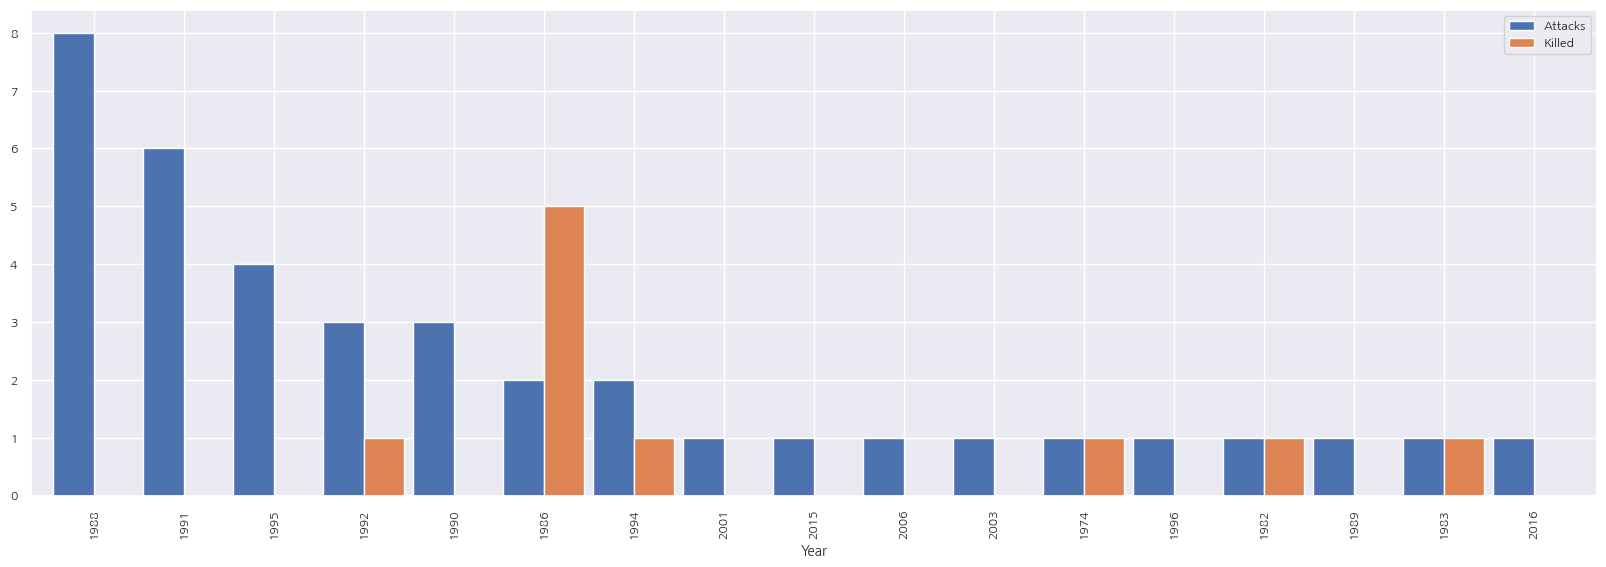

In [300]:
kr_coun_terror=korea_terror['Year'].value_counts().to_frame()
kr_coun_terror.columns=['Attacks']
kr_coun_kill=korea_terror.groupby('Year')['Killed'].sum().to_frame()
kr_coun_terror.merge(kr_coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

1986년 김포공항 폭발 사건 5명 사망,,,!!!

In [304]:
korea_terror_killed = korea_terror[korea_terror['Killed'] >=1]

테러로 인한 사망발생 사건 list

In [310]:
korea_terror_killed.reset_index()

index  Year  Month  Day      Country     Region  \
0   2514  1974      8   15  South Korea  East Asia   
1  15734  1982      3   18  South Korea  East Asia   
2  19820  1983      9   22  South Korea  East Asia   
3  29151  1986      9   14  South Korea  East Asia   
4  52432  1992      8    4  South Korea  East Asia   
5  56986  1994      8    4  South Korea  East Asia   

                          city   latitude   longitude  \
0                        Seoul  37.566535  126.977969   
1                        Busan  35.179554  129.075642   
2                        Daegu  35.871435  128.601445   
3  Gimpo International Airport  37.558947  126.798341   
4                    Uijeongbu  37.738098  127.033682   
5                        Seoul  37.566535  126.977969   

                       AttackType  Killed  Wounded  \
0                   Assassination     1.0      0.0   
1  Facility/Infrastructure Attack     1.0      3.0   
2               Bombing/Explosion     1.0      4.0   
3               Bombing/Explosion     5.0     19.0   
4                   Assassination     1.0      0.0   
5                 Unarmed Assault     1.0      0.0   

                                              Target Summary  \
0                          wife, Pres. Chung Hu Park     NaN   
1                   US Government Information Office     NaN   
2  US Cultural Center (housed in a 5 story building)     NaN   
3                        Kimpo International Airport     NaN   
4                                         Army NCO *     NaN   
5         Suspected police informer Chon Kwi-Hui, 38     NaN   

                  Group                  Target_type Weapon_type Motive  \
0   Korean Youth League         Government (General)    Firearms    NaN   
1               Unknown      Government (Diplomatic)  Incendiary    NaN   
2               Unknown      Government (Diplomatic)  Explosives    NaN   
3               Unknown          Airports & Aircraft  Explosives    NaN   
4               Unknown                     Military       Melee    NaN   
5  Korea Univ. Students  Private Citizens & Property       Melee    NaN   

   casualities  
0          1.0  
1          4.0  
2          5.0  
3         24.0  
4          1.0  
5          1.0

총 여섯건 확인 그중에 김포국제공항이 피해 규모가 가장크다

평화... 그것은 소중...


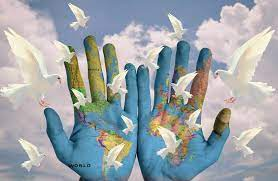